# [Module 31 Creating sample regression data](https://youtu.be/tpCFfeUEGs8?t=15459)

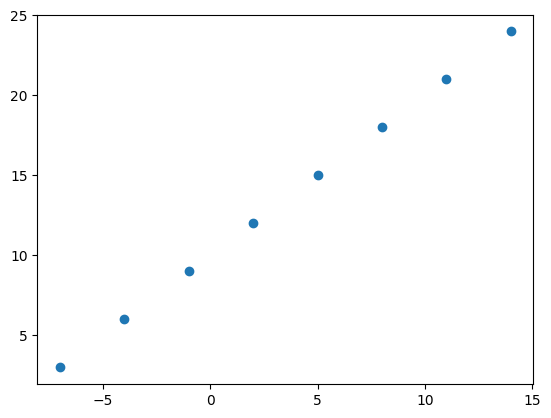

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


X = np.array([-7, -4, -1, 2, 5, 8, 11, 14])  # making data to view and fit
y = np.array([3, 6, 9, 12, 15, 18, 21, 24])  # create labels

# visualize it
plt.scatter(X, y)

# we want it to learn that
# print(X == Y - 10)

# house price demo tensor
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([937_000])

# X and Y are the same shape, so we want to use X[i] to predict Y[i]


# [Module 32 Steps in modelling with Tensorflow](https://youtu.be/tpCFfeUEGs8?t=16119)

### Steps in modelling with tensorflow
1. Creating the model: define the input and output layers, as well as the hidden layers if it's a deep learning model
2. Compile the model:
3. Fitting the model: let the model try to find patterns between X and y (features and labels)
4. Evaluate the model

### Compiling the model
1. Define the loss function: function that tells our model how wrong it is
2. Define the optimizer: function that tells our model how to improve the patterns it's learning
3. Evaluation metrics: what we use to interpret performance of the model


In [5]:
# turn x and y into tensors
X = tf.constant(X)
y = tf.constant(y)
input_shape = X[0].shape
# input_shape
# set random seed:


In [19]:
# tf.keras.optimizers.legacy.Adam()  # need this to work on M1 CPU. wait maybe not
# set random seed
tf.random.set_seed(42)

X = tf.reshape(X, (-1, 1)) # I don't know why this is needed??

# 1 create the model
# use sequential API
model = tf.keras.models.Sequential(
    # tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)  # 1 because we have 1 number as input and one as output
)
# equivalent way to do step 1:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(1))

# 2 compile the model
model.compile(loss=tf.keras.losses.MAE,  # mean absolute error is loss fn
              optimizer=tf.keras.optimizers.SGD(),  # stochastic gradient descent
              metrics=["mae"])

# 3 fitting the model
model.fit(X, y, epochs=5)

# 4 evaluate the model

Epoch 1/5
1/1 [==============================] - 0s 138ms/step - loss: 19.4446 - mae: 19.4446
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 19.1634 - mae: 19.1634
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 18.8821 - mae: 18.8821
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 18.6009 - mae: 18.6009
Epoch 5/5
1/1 [==============================] - 0s 1ms/step - loss: 18.3196 - mae: 18.3196


In [18]:
# try and make a prediction using our model
model.predict([17])  # not that good, can be improved w more epochs

1/1 [==============================] - 0s 30ms/step


array([[29.53802]], dtype=float32)

# [Module 33 Improving a model part 1](https://youtu.be/tpCFfeUEGs8?t=17333)
(No code associated with this module)

Improving step 1: create a model
1. We might add more layers (neurons)
2. We might change activation function within each layer

Improving step 2: compile the model
1. change optimization function
2. change learning rate of optimization function

Improving step 3: fit a model
1. Fit model for more epochs
2. Give more training data

# [Module 34 Improving a model part 2](https://youtu.be/tpCFfeUEGs8?t=17696)
Better version of module 32's model

In [30]:

# 1 create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),  # 3 hidden layers. 100 neurons per hidden layer
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)  # 1 because we have 1 number as input and one as output
])

# 2 compile the model
model.compile(loss=tf.keras.losses.mae,  # mean absolute error is loss fn
              optimizer=tf.keras.optimizers.SGD(),  # could use adam instead of SGD with Adam(learning_rate=0.0001). idk why we'd chose such a low rate
              metrics=["mae"])

# 3 fitting the model
model.fit(X, y, epochs=100)

# make prediction
model.predict([17])

Epoch 1/100
1/1 [==============================] - 0s 195ms/step - loss: 13.7619 - mae: 13.7619
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 13.2854 - mae: 13.2854
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 12.8858 - mae: 12.8858
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 12.4689 - mae: 12.4689
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 12.0380 - mae: 12.0380
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 11.5601 - mae: 11.5601
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 11.0134 - mae: 11.0134
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 10.3592 - mae: 10.3592
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 9.5750 - mae: 9.5750
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 8.5773 - mae: 8.5773
Epoch 11/100
1/1 [==============================] - 0s 2ms/st

array([[31.208849]], dtype=float32)

# [Module 35 Improving a model part 3](https://youtu.be/tpCFfeUEGs8?t=18262)
Changing the same model again. It's better to start with smaller changes.  It's also better to start with less complicated models which are fast to run and then tweak to make more complex (like adding more layers or epochs).

Not every tweak to make it more complex helps. We might overfit by accident

### Common ways to improve deep learning model:
1. Adding layers
2. Increase number of hidden units (neurons per layer)
3. Change activation function (like "relu")
4. Change optimization function (like SGD() or Adam())
5. Change learning rate (tends to be the most important hyperparameter)
6. Train on more data
7. Fit for longer

In [36]:
# 1 create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),  # 3 hidden layers. 100 neurons per hidden layer
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)  # 1 because we have 1 number as input and one as output
])

# 2 compile the model
model.compile(loss=tf.keras.losses.mae,  # mean absolute error is loss fn
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),  # could use adam instead of SGD with Adam(learning_rate=0.0001). idk why we'd chose such a low rate
              metrics=["mae"])

# 3 fitting the model
model.fit(X, y, epochs=100)

# make prediction
model.predict([17])


Epoch 1/100
1/1 [==============================] - 0s 191ms/step - loss: 13.2601 - mae: 13.2601
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 13.2243 - mae: 13.2243
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 13.1884 - mae: 13.1884
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 13.1504 - mae: 13.1504
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 13.1124 - mae: 13.1124
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 13.0761 - mae: 13.0761
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 13.0402 - mae: 13.0402
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 13.0043 - mae: 13.0043
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 12.9682 - mae: 12.9682
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 12.9320 - mae: 12.9320
Epoch 11/100
1/1 [==============================] - 0s 1m

array([[24.329931]], dtype=float32)

# [Module 36 evaluating a model part 1: visualizations](https://youtu.be/tpCFfeUEGs8?t=19015)

### Typical workflow when building neural networks:
1. Build model
2. Fit it
3. Evaluate it
4. Tweak it
5. Repeat

### What should we visualize when evaluating:
- The data we're working with
- The model itself (what does the model look like)
- The training of a model (how does the model perform while it learns)
- The predictions of the model, and how do they line up with the real answer

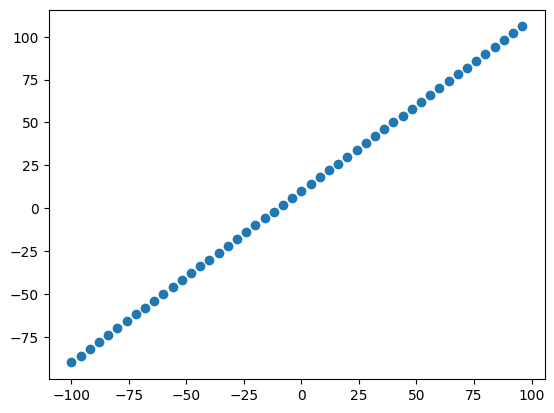

In [8]:
# make larger dataset
X = tf.range(-100, 100, 4)
y = X + 10

plt.scatter(X, y)


# [Module 37 evaluating a model part 2: the datasets](https://youtu.be/tpCFfeUEGs8?t=19460)

### The sets of data and how we split it up
1. Training dataset 70-80%
2. Validation dataset (where we tweak hyperparameters) 10-15%  (sometimes optional)
3. Test set

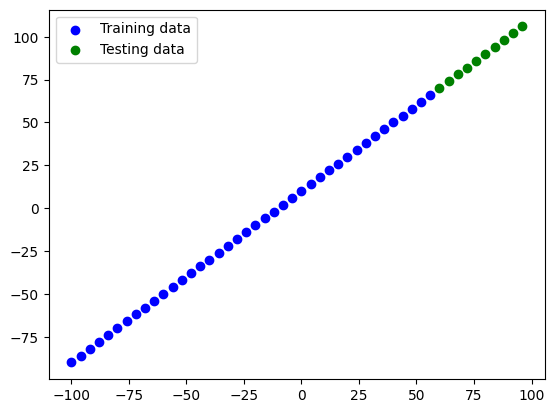

In [9]:
# we'll skip the validation set for now

# train test split:
X_train, X_test = X[:40], X[40:]
y_train, y_test = y[:40], y[40:]

# visualizing the data
plt.scatter(X_train, y_train, c="blue", label="Training data")  # plot training data in blue
plt.scatter(X_test, y_test, c="green", label="Testing data") # plot training data in green
plt.legend()
plt.show()

# [Module 38 evaluating a model part 3: model summary](https://youtu.be/tpCFfeUEGs8?t=20122)
let's build a neural network for our data

In [59]:
tf.random.set_seed(42)
# 1 create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    # tf.keras.layers.Dense(100, input_shape=[1], name="uh"),
    tf.keras.layers.Dense(1, input_shape=[1], name="output_layer")  # input shape is 1 because X is one input to give one output
], name="module_38_model")
# 2 compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [60]:
# visualize model before we fit it. we need to determine input_shape
model.build()
model.summary()

Model: "module_38_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### model.summary() explanation

- total params: total number of parameters in the model. this one is 2 because it's learning relationship between X and y
- trainable parameters:
- non-trainable params aren't updated during training. Used in already learned patterns/parameters from already learned models you import in tansfer learning

In [61]:
# 3 fit model
model.fit(X_train, y_train, epochs=100) # verbose=0 to leave out progress bars

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 17.5051 - mae: 17.5051
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 27.6223 - mae: 27.6223
Epoch 3/100
2/2 [==============================] - 0s 1ms/step - loss: 31.2000 - mae: 31.2000
Epoch 4/100
2/2 [==============================] - 0s 1ms/step - loss: 16.8919 - mae: 16.8919
Epoch 5/100
2/2 [==============================] - 0s 1ms/step - loss: 23.0515 - mae: 23.0515
Epoch 6/100
2/2 [==============================] - 0s 1ms/step - loss: 10.9046 - mae: 10.9046
Epoch 7/100
2/2 [==============================] - 0s 1ms/step - loss: 11.9422 - mae: 11.9422
Epoch 8/100
2/2 [==============================] - 0s 1ms/step - loss: 13.0135 - mae: 13.0135
Epoch 9/100
2/2 [==============================] - 0s 1ms/step - loss: 34.3622 - mae: 34.3622
Epoch 10/100
2/2 [==============================] - 0s 1ms/step - loss: 23.7757 - mae: 23.7757
Epoch 11/100
2/2 [==============================] - 0s 1ms/

# [Module 39 evaluating a model part 4: visualizing layers](https://youtu.be/tpCFfeUEGs8?t=21159)

This doesn't work at all. I don't know why. I wonder if it's a problem with my M1 computer. installing pydot and graphviz didn't help

In [10]:
# from tensorflow.keras.utils import plot_model
# plot_model(model=model)


3
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


 # [Module 40 evaluating a model part 5: visualizing predictions](https://youtu.be/tpCFfeUEGs8?t=21596)

Plot predictions against ground truth labels. Usually y_test vs y_pred

In [62]:
# make predictions
predications = model.predict(X_test)
print(y_test)

1/1 [==============================] - 0s 26ms/step
tf.Tensor([ 70  74  78  82  86  90  94  98 102 106], shape=(10,), dtype=int32)


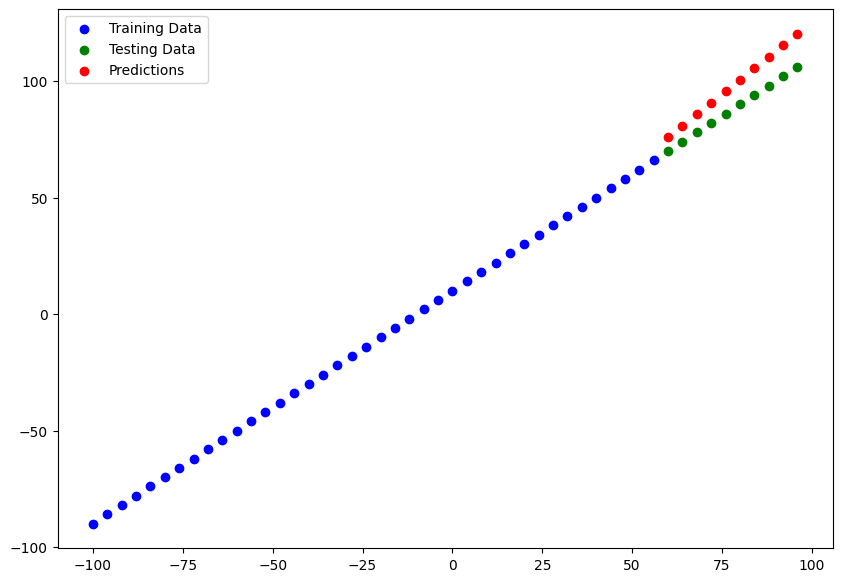

In [63]:
# make plotting function we can use going forward
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="blue", label="Training Data")
    plt.scatter(test_data, test_labels, c="green", label="Testing Data")
    plt.scatter(test_data, predictions, c="red", label="Predictions")
    plt.legend()
    plt.show()
plot_predictions(X_train, y_train, X_test, y_test, predications)

 # [Module 41 evaluating a model part 6: regression evaluation metrics](https://youtu.be/tpCFfeUEGs8?t=21596)

### Evaluating metrics depends on the type of problem we're dealing with
Main ones for regression:
1. MAE: on average, how wrong are my model's predictions. Generally appropriate for most things
2. MSE: mean square errors. Appropriate when larger errors are more significant than smaller ones.
3. Huber: (tf.keras.losses.Huber()). Combination of MAE and MSE. Less sensitive to outliers than MSE

# [Module 42 evaluating a model part 7: MAE as regression evaluation metric](https://youtu.be/tpCFfeUEGs8?t=22639)


In [69]:
# evaluate the model on the test set
print(model.evaluate(X_test, y_test)) # gives loss, evalueation metric
tf.metrics.mean_absolute_error(y_test, y_pred=predications) # gives us accuracy for each prediction if we have mismatched shapes

print(y_test.shape, predications.shape)

# get rid of extra dimension on predictions with squeeze
y_pred = tf.squeeze(predications)

tf.metrics.mean_absolute_error(y_test, y_pred) # now we have the overall



1/1 [==============================] - 0s 10ms/step - loss: 10.0433 - mae: 10.0433
[10.043340682983398, 10.043340682983398]
(10,) (10, 1)


<tf.Tensor: shape=(), dtype=float32, numpy=108.140625>

# [Module 43 evaluating a model part 8: MSE as regression evaluation metric](https://youtu.be/tpCFfeUEGs8?t=22990)


In [72]:
print(tf.metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)) # errors tend to be larger on MSE than MAE (obviously)

# functions for MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=y_pred)

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true, y_pred=y_pred)

tf.Tensor(108.140625, shape=(), dtype=float32)
